# K-Means Clustering

In [21]:
# importing required libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

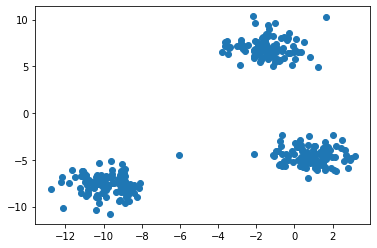

In [7]:
# making random clusters
X, y_true = make_blobs(n_samples = 300, centers = 3, cluster_std = 1, random_state = 100)
plt.scatter(X[:, 0], X[:, 1])

In [8]:
# fitting a k-means clustering model
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

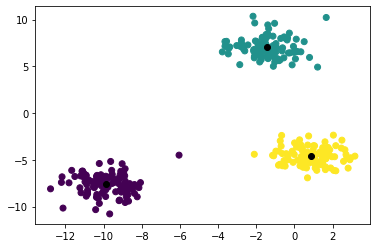

In [10]:
# plotting the cluster formed by the algorithm
plt.scatter(X[:, 0], X[:, 1], c = y_kmeans)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = 'black')

# K Nearest Neighbour Classification

In [15]:
# loading the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
dataset = pd.read_csv(url, names = names)
dataset

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [18]:
# Splitting into training and testing set
X_train, X_test, y_train, y_test = train_test_split(dataset.iloc[:,:-1], dataset.iloc[:,-1], test_size = 0.30)

In [19]:
# performing standardization
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
# training the model
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [22]:
# predicting and evaluating
y_train_pred = classifier.predict(X_train)
confusion_matrix(y_train, y_train_pred)

array([[37,  0,  0],
       [ 0, 31,  2],
       [ 0,  1, 34]])

In [24]:
y_test_pred = classifier.predict(X_test)
confusion_matrix(y_test, y_test_pred)

array([[13,  0,  0],
       [ 0, 16,  1],
       [ 0,  1, 14]])